# Polynomial Regression

In this notebook we're going to work with a new dataset and illustrate polynomial regression.

But first lets import the packages and load the ozone dataset



In [5]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns


## The dataset

In [8]:

df = pd.read_csv('./data/ozone.csv')

# Drop Day and Month columns
df= df.drop(columns = ['Day', 'Month'])

# Rename Solar.R as Solar
df = df.rename(columns = {'Solar.R': 'Solar'})

# Remove samples with missing values
df.dropna(inplace = True)

df.shape

(111, 4)

The ozone dataset is composed of 111 samples of
daily ozone levels.

In [9]:
df.head()

,Ozone,Solar,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
6,23.0,299.0,8.6,65


* The outcome is the amount of ozone in the air

and the predictors are 

* the amount of solar radiation,
* the temperature in Farenheit
* and the wind speed in miles per hour.


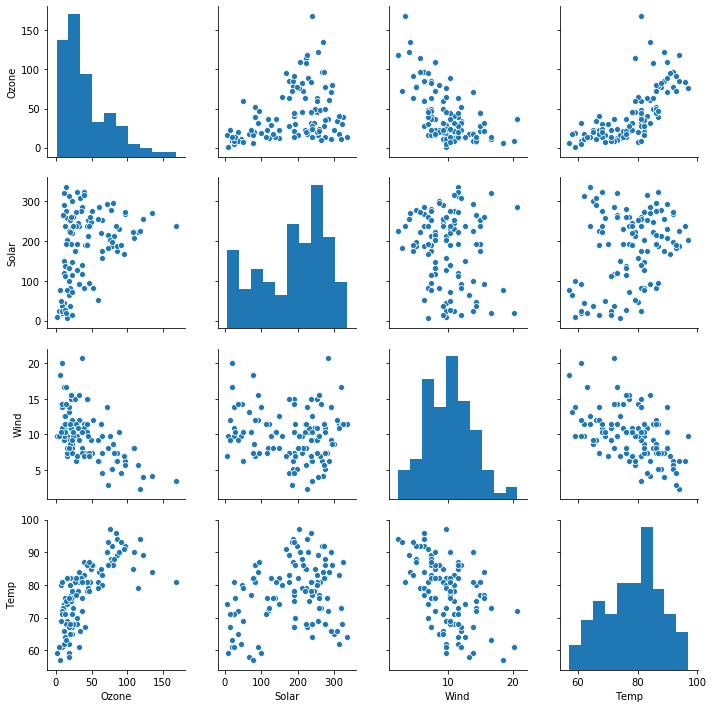

In [10]:
sns.pairplot(df)

Let's first build a baseline model: Ozone vs Wind

In [12]:
M1 = smf.ols('Ozone ~ Wind ', df).fit()
M1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     65.44
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           9.09e-13
Time:                        16:39:04   Log-Likelihood:                -519.94
No. Observations:                 111   AIC:                             1044.
Df Residuals:                     109   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.0413      7.472     13.254      0.000      84.231     113.851
Wind          -5.7288      0.708     -8.090      0.000      -7.132      -4.325
==============================================================================
Omnibus:                        9.375   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.508
Skew:                           0.708   Prob(JB):                      0.00862
Kurtosis:                       3.228   Cond. No.                         31.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Everything looks good and we have a baseline R-squared of 0.36.

## Polynomial regression
Polynomial regression consists in using
the powers of the predictors
to build linear regression models.

We are going to compare polynomial models of the
Ozone vs Wind model up to the power of 5.


Let's now create new variables composed of
the powers of the Wind variable up to the 5th degree


In [13]:
for n in range(2,6):
    df['wind_' + str(n)] = df.Wind**(n)

df.head()


,Ozone,Solar,Wind,Temp,wind_2,wind_3,wind_4,wind_5
0,41.0,190.0,7.4,67,54.76,405.224,2998.6576,22190.06624
1,36.0,118.0,8.0,72,64.00,512.000,4096.0000,32768.00000
2,12.0,149.0,12.6,74,158.76,2000.376,25204.7376,317579.69376
3,18.0,313.0,11.5,62,132.25,1520.875,17490.0625,201135.71875
6,23.0,299.0,8.6,65,73.96,636.056,5470.0816,47042.70176


and we build the polynomial regression models
each time adding a higher power of wind


In [14]:
# The baseline
models = [M1]
M = 'Ozone ~ Wind '
for n in range(2,6):
    M += ' + wind_{}  '.format(n)
    print(M)
    # fit the model and add to the list of models
    models.append( smf.ols(M, df).fit()  )


Ozone ~ Wind  + wind_2  
Ozone ~ Wind  + wind_2   + wind_3  
Ozone ~ Wind  + wind_2   + wind_3   + wind_4  
Ozone ~ Wind  + wind_2   + wind_3   + wind_4   + wind_5  


Here, we store the different models into a list that we call models

We can notice that as we increase the power of the polynomial,
 the R-squared also increases


In [21]:
for n in range(1,6):
    print( " degree: {} R**2 {:.4f} ".format(n, models[n-1].rsquared ) )

 degree: 1 R**2 0.3752 
 degree: 2 R**2 0.5055 
 degree: 3 R**2 0.5157 
 degree: 4 R**2 0.5176 
 degree: 5 R**2 0.5358 


However this does not mean that our model is actually better.

## Overfitting

As we increase the complexity of the model by adding powers of the wind variable,
the model will tend to overfit the data.

Let's illustrate that overfitting phenomenon
by fitting a degree 5 polynomial to a Ozone vs Temperature model

We take only 30 samples of the original dataset to make the graph more readable.


In [16]:
np.random.seed(8)
sdf = df.sample(n = 30)


Let's fit a 2nd degree polynomial to the Ozone vs Temp variables

In [17]:
q  = np.polyfit(sdf.Ozone.values, sdf.Temp.values, 2)
qx = np.linspace(sdf.Ozone.min(),sdf.Ozone.max(), 100)


We get the fitted values of a 2nd degree polynomial

In [18]:
qy = q[0] * qx**2 + q[1] * qx + q[2]

And let's also fit a 5th degree polynomial to the same data

In [19]:
p  = np.polyfit(sdf.Ozone.values, sdf.Temp.values, 5)
py = p[0] * qx**5 + p[1] * qx**4 + p[2] * qx**3 +  p[3] * qx**2 + p[4] * qx + p[5]



The 5th degree model is much more complex than the 2nd degree model.

The comparative plot shows that the 5th degree polynomial is highly dependent on the samples while the 2nd degree polynomial gives a good approximation.


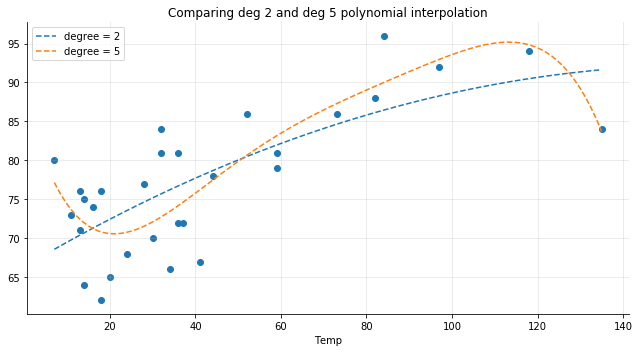

In [20]:
fig, ax = plt.subplots(1,1, figsize = (9,5))
plt.scatter(sdf.Ozone, sdf.Temp, label = '')
plt.plot(qx, qy, '--', label = 'degree = 2')
plt.plot(qx, py, '--', label = 'degree = 5')
plt.grid(alpha = 0.3)
plt.title("Comparing deg 2 and deg 5 polynomial interpolation")
plt.xlabel('Ozone')
plt.xlabel('Temp')
sns.despine()
plt.legend()
plt.tight_layout()
plt.show()
